In [1]:
#Importing the required libraries
from qiskit import *
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_gate_map

In [2]:
# Loading your IBM Quantum account(s)
#If the load account command does not work, you need to use IBMQ.save_account('API TOKEN'), where the API token is in your ibmq portal
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()
backend = provider.get_backend('ibmq_belem')

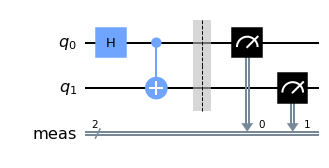

In [3]:
#Creating a bell state (optimally entangled qubits)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

In [5]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [6]:
# run job on hardware
job = backend.run(transpile(qc, backend=backend), shots=1024)
print(job.job_id())
job_monitor(job)

62c5aefdd8e29da7ab20dbce
Job Status: job has successfully run


In [7]:
#retrieve previously-run job
job = backend.retrieve_job(job.job_id()) 

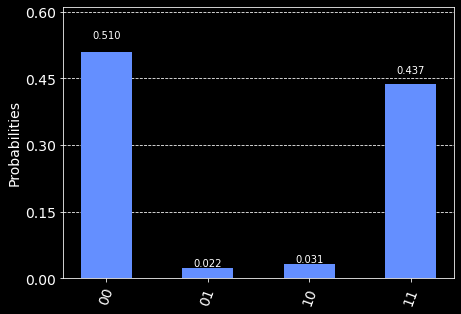

In [8]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plot_histogram(job.result().get_counts())